In [10]:
# JHAMPIER TAPIA SUCAPUCA
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
# Read the text file, using semicolon as separator - JHAMPIER
df_train = pd.read_csv('../data/train.txt', 
                 sep=';', 
                 header=None, 
                 names=['text', 'label'])
df_test = pd.read_csv('../data/test.txt', 
                 sep=';', 
                 header=None, 
                 names=['text', 'label'])
print(df.head())

                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [9]:
# Realizando el CONTEO
df.label.value_counts()


label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

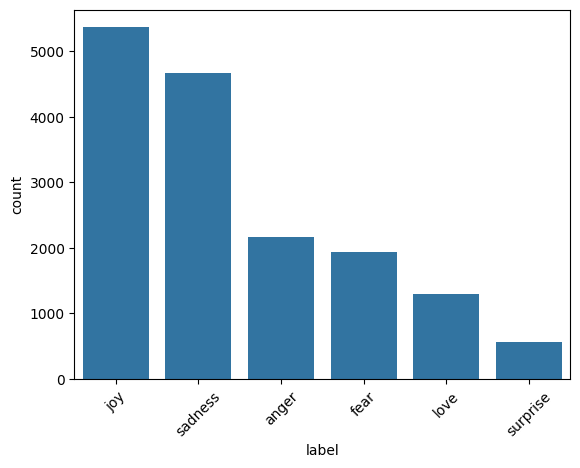

In [11]:
# GRAFICO 
import matplotlib.pyplot as plt

sns.countplot(
    data=df,
    x="label",
    order=df["label"].value_counts().index
)

plt.xticks(rotation=45)   # rotate x labels for readability
plt.show()

## ENTRENAMIENTO

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import io

In [18]:
X_train = df_train['text']
y_train = df_train['label']
X_test = df_test['text']
y_test = df_test['label']

In [20]:
# --- 3. Vectorización de Texto (TF-IDF) ---
# importantes que no aparecen en muchos documentos.
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
# ngram_range=(1, 2) incluye palabras solas (unigramas) y pares de palabras (bigramas)
tfidf_vectorizer

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [26]:
# Ajustar (aprender vocabulario) y transformar los datos de entrenamiento
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba usando el vocabulario aprendido
X_test_vectorized = tfidf_vectorizer.transform(X_test)

print("Datos vectorizados correctamente.")
print("-" * 35)

Datos vectorizados correctamente.
-----------------------------------


In [27]:
# --- 4. Entrenamiento del Modelo ---
# La Regresión Logística (Logistic Regression) es un clasificador simple y robusto 
# que funciona bien como baseline para tareas de clasificación de texto.
print("--- Iniciando Entrenamiento del Modelo: Logistic Regression ---")
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
model.fit(X_train_vectorized, y_train)
print("Entrenamiento Finalizado. 🎉")
print("-" * 35)

--- Iniciando Entrenamiento del Modelo: Logistic Regression ---


/home/jhampits/IA/IA_GEN_UNI/20251012/venvuni/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Entrenamiento Finalizado. 🎉
-----------------------------------


In [28]:
# --- 5. Evaluación del Modelo ---
y_pred = model.predict(X_test_vectorized)

# Cálculo de la Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del Modelo (Accuracy): {accuracy:.4f}")

Precisión del Modelo (Accuracy): 0.8300


In [29]:
# Informe de Clasificación detallado
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))


Informe de Clasificación:
              precision    recall  f1-score   support

       anger       0.91      0.73      0.81       275
        fear       0.86      0.72      0.78       224
         joy       0.78      0.97      0.86       695
        love       0.87      0.47      0.61       159
     sadness       0.86      0.91      0.89       581
    surprise       0.90      0.29      0.44        66

    accuracy                           0.83      2000
   macro avg       0.86      0.68      0.73      2000
weighted avg       0.84      0.83      0.82      2000



In [33]:
# --- 6. Ejemplo de Predicción (Opcional) ---
print("--- Prueba con Nueva Frase ---")
new_text = ["i am feeling more confident that we will be able to take care of this baby"]
new_text_vectorized = tfidf_vectorizer.transform(new_text)
prediction = model.predict(new_text_vectorized)

print(f"Texto: '{new_text[0]}'")
print(f"Emoción Detectada: {prediction[0].upper()}")

--- Prueba con Nueva Frase ---
Texto: 'i am feeling more confident that we will be able to take care of this baby'
Emoción Detectada: JOY
